In [229]:
def noised_norm(l, noise_std=0.1, noise_w=0.2):
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), l)
    noise = np.random.normal(0, noise_std, x.shape)
#     noise = np.sin(np.random.normal(0, noise_std, x.shape))
    return x, norm.pdf(x, 0, 1) + noise*noise_w

In [28]:
def sample(l):
    return np.sort(np.random.normal(0, 1, l))

In [220]:
def matrix_creator(sections):
    sections = [max_norm(centered(sec)) for sec in sections]
    center_idx = np.argmax(sections[0])
    matrix = np.diag(sections[0])
    
    return matrix
        

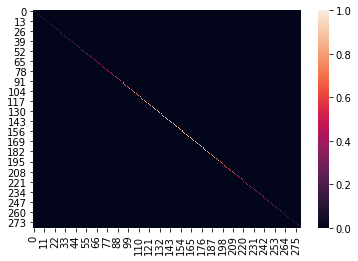

In [232]:
sns.heatmap(matrix_creator(sections))

In [104]:
import os
import re
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [15]:
def max_norm(arr):
    return (arr - (min(arr))) / (max(arr) - min(arr))

In [16]:
def centered(arr, offset=False):
#     print(len(arr))
    max_idx = arr.argmax()
    
    if offset:
        return arr[max_idx - offset: max_idx + offset + 1]
    
    left, right = arr[:max_idx], arr[max_idx+1:]
#     print(left, right)
    offset = min(map(len, [left, right]))
    res = arr[max_idx - offset: max_idx + offset + 1]
        
    return res, offset

In [99]:
def get_data(path, offset=60):
    data = {}
    
    for file in os.listdir(path):
        if '.LSF' in file:
            with open(os.path.join(path, file), 'r') as f:
                lines = f.readlines()
    
            lines = lines[12:]
            num_data = np.array([float(line.strip()) for line in lines])
            num_data = centered(num_data, offset=offset)
            num_data = max_norm(num_data)
            
            ke_data = ke_func(num_data)
            
            data[file.strip('_')] = num_data, ke_data
            
    return data

In [114]:
def plot_files(data):

    fig, ax = plt.subplots(figsize=(10, 10))
    
    for label, nums in data.items():
        plt.plot(np.arange(0, len(nums)), nums, label=label)

    plt.grid(True)
    plt.legend()
    plt.show()

In [109]:
def ke_func(arr, d=30):
    idx = arr.argmax()
    new_arr = [arr[idx]]
    offset = 1
    while True:
        try:
            new_arr.append(arr[idx + offset] + arr[idx - offset])
        except:
            break
        offset += 1
    
    s = np.cumsum(new_arr)
    
    return s, s[int(d/2)-1]/s[-1]

In [105]:
def main():
    
    print('Программа просмотра графиков из файлов .LSF\nДля справки введите "help"')
    
    command_patterns = {
        'path': re.compile(r'([\d\w:\\_-]+)'),
        'offset': re.compile(r'\d+')
    }
    
    while True:
        
        command = input().split()
        
        if command[0] == 'help':
            print("""
            - укажите путь к директории с файлами данных при помощи команды 'path': 
            
            path C:\lsf_dir\
            
            не допускаются специальные символы кроме нижнего подчеркивания '_' и дефиса '-', а также пробелы;
            
            - для вывода изображения графиков введите комманду 'draw':
            
            draw
            
            - [не работает] для изменения ширины области значений графика (по умолчанию - 60) введите команду 
            'draw offset' и соответствующее значение:
            
            draw offset 80;
            
            - Для завершения закройте окно консоли.
            """)
            continue
        
        elif command[0] == 'path':
            #указание пути к файлу
            try:
                if re.match(command_patterns['path'], command[1]):
                    path = command[1]
                    print(f'Используется путь {path}')
                else:
                    print('Неправильный путь, используйте help для справки')
            except:
                print('Неправильный путь, используйте help для справки')
            
            continue
            
        elif command[0] == 'draw':
            #вывод графиков
            try:
                data = get_data(path)
            except Exception as e:
                print(e)   
                continue
            
            # ФРЛ
            plot_files({key: values[0] for key, values in data.items()})
            # КЭ
            plot_files({key + ' {:.3f}'.format(values[1][1]): max_norm(values[1][0])
                       for key, values in data.items()})
            continue
        
        elif command[0] == 'exit':
            break
            
        else:
            print('Неизвестная команда, используйте help для справки')

Программа просмотра графиков из файлов .LSF
Для справки введите "help"
path C:\Users\smirnov.da\Desktop\Визуализаци\К1
Используется путь C:\Users\smirnov.da\Desktop\Визуализаци\К1
draw


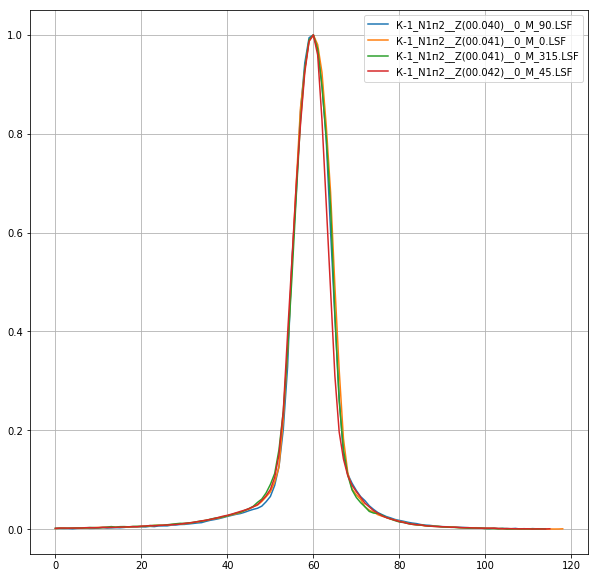

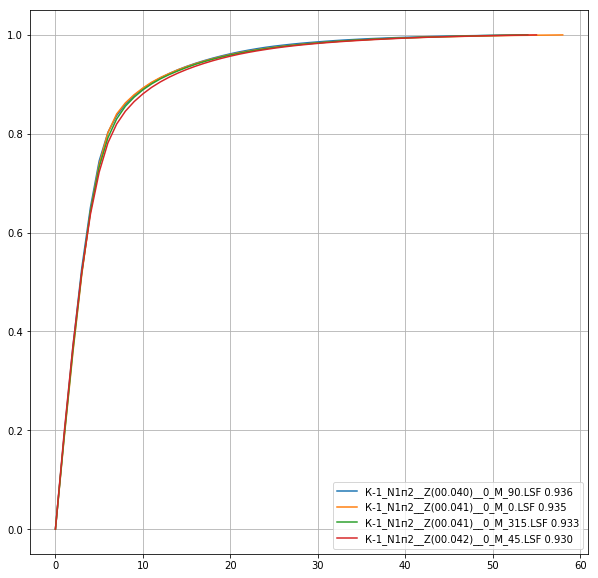

exit


In [115]:
if __name__ == "__main__":
    main()